In [1]:
using Pkg
Pkg.activate(joinpath(@__DIR__,".."))
using LadderDGA
using OffsetArrays
using LaTeXStrings
using Plots
using Plots.PlotMeasures

  Activating project at `G:\Codes\LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b] (cache misses: include_dependency fsize change (20))
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.


In [ ]:
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"));

[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 40


  Activating project at `G:\Codes\LadderDGA.jl`


┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(1:301) = 0.4356, χLoc_d(1:301) = 0.0644
│ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24860048983264754 ?=? 0.2500077791504396 ?≈? 0.25000777915043954 ≟ 0.24999903238559407"
└ Local EoM check for the first 5 frequencies: 0.0001 [0.0045%], 0.0002 [0.0069%], 0.0002 [0.009%], 0.0003 [0.0112%], 0.0003 [0.0135%]  


DBG: NOT using diagonal terms in λ₀


In [ ]:
kintegrate = LadderDGA.kintegrate
KGrid = LadderDGA.KGrid
grid_dimension = LadderDGA.Dispersions.grid_dimension
expandKArr = LadderDGA.Dispersions.expandKArr
gridPoints = LadderDGA.Dispersions.gridPoints
gen_ϵkGrid = LadderDGA.Dispersions.gen_ϵkGrid
grid_type = LadderDGA.Dispersions.grid_type
gen_sampling = LadderDGA.Dispersions.gen_sampling
basis_transform = LadderDGA.Dispersions.basis_transform
gridshape = LadderDGA.Dispersions.gridshape
reduceKArr = LadderDGA.Dispersions.reduceKArr
#ϵ_k_plus_q = LadderDGA.Dispersions.ϵ_k_plus_q
kG = lDGAhelper.kG
wn2 = LadderDGA.iω_array(lDGAhelper) .^ 2
vn  = LadderDGA.iν_array(lDGAhelper);

In [18]:
xr_EPP,yrEPP = LadderDGA.LambdaCorrection.PPCond_curve(χm, γm, χd, γd, λ₀, lDGAhelper; 
   tc=ΣTail_λm, feps_abs=1e-8, xeps_abs=1e-8,
    maxit=200,  λmin = LadderDGA.LambdaCorrection.get_λ_min(χd), λmax=30.0, verbose=false)

([-4.428766997669926, -4.15979225550063, -4.0253048844159816, -3.890817513331333, -3.756330142246685, -3.621842771162037, -3.3528680289927406, -3.2183806579080922, -3.0838932868234443, -2.814918544654148  …  28.251664175899574, 28.386151546984223, 28.655126289153518, 28.924101031322813, 29.058588402407462, 29.19307577349211, 29.462050515661407, 29.7310252578307, 29.86551262891535, 30.0], [-0.49078412474389427, -0.36691551130982986, -0.5094355863694713, -0.2713400846519424, -0.4287346549116113, -0.2779261397142066, -0.43437296693531935, -0.33775719629700884, -0.9815758751539512, -0.45937028304311445  …  -0.3423636084734165, -0.3424615540260133, -0.3426554731559347, -0.34284681195892364, -0.3429415316717267, -0.34303562760001965, -0.3432219754779152, -0.34340590929475695, -0.3434969872647245, -0.34358748112260223])

In [19]:
xr_EPot,yrEPot = LadderDGA.LambdaCorrection.EPotCond_curve(χm, γm, χd, γd, λ₀, lDGAhelper; 
   tc=ΣTail_λm, feps_abs=1e-8, xeps_abs=1e-8,
    maxit=200,  λmin = LadderDGA.LambdaCorrection.get_λ_min(χd), λmax=30.0, verbose=false)

([-9.926757780738221, -9.770793883157213, -9.614829985576204, -9.302902190414187, -8.99097439525217, -8.83501049767116, -8.679046600090151, -8.523082702509143, -8.367118804928133, -8.055191009766116  …  27.972469331446888, 28.128433229027898, 28.440361024189915, 28.596324921770922, 28.752288819351932, 29.06421661451395, 29.376144409675966, 29.532108307256976, 29.688072204837983, 30.0], [NaN, -0.20975762636747075, -0.03508330574592772, -0.0703274234882057, -0.012188618478243596, -0.025209420841991015, -0.03107951020529165, -0.034227464947635816, -0.036014047991298065, -0.03756523587561661  …  0.004157761384255873, 0.004193644712077421, 0.004264840371265191, 0.004300156038904601, 0.004335285788988341, 0.004404993988844752, 0.00447397768214472, 0.0045082017280702325, 0.004542249277391067, 0.004609820889394295])

In [ ]:
xr_EPot_sc,yrEPot_sc = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm, γm, χd, γd, λ₀, lDGAhelper; 
    method=:sc, tc=ΣTail_λm, feps_abs=1e-8, xeps_abs=1e-8,
    maxit=40, maxit_sc=50, mixing=0.3, λmin = -2.0 , λmax=3.0, sc_conv_abs=1e-7,
    verbose=false, verbose_sc=false)

In [ ]:
p = plot(xr_EPot,yrEPot, lw=2.5, xlabel=L"\lambda_\mathrm{d}", ylabel=L"E^{(1)}_{\mathrm{pot}} - E^{(2)}_{\mathrm{pot}}", xlims=(-3,3), ylims=(-0.1,0.1),
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12,
    label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm}}")
plot!(xr_EPot_sc,yrEPot_sc,  lw=2.5,label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}", left_margin = 10mm, bottom_margin=10mm)
savefig("epot_cond_sc_n0.83_comp.pdf")
display(p)

In [ ]:
p = plot(xr_EPot,yrEPot, lw=2.5, xlabel=L"\lambda_\mathrm{d}", ylabel=L"E^{(1)}_{\mathrm{pot}} - E^{(2)}_{\mathrm{pot}}", xlims=(-3,1), ylims=(-0.02,0.02), markershape=:auto,
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12,
    label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm}}")
plot!(xr_EPot_sc,yrEPot_sc,  lw=2.5,label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}", left_margin = 10mm, bottom_margin=10mm, markershape=:auto,)
savefig("epot_cond_sc_n0.83_comp.pdf")
display(p)

In [ ]:
res_dm_sc_Full =  LadderDGA.LambdaCorrection.λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_Full, λd_δ = 1e-2)

In [ ]:
res_dm_sc_Step = LadderDGA.LambdaCorrection.λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_ExpStep{0.7})

In [ ]:
res_dm_sc_Tail =  LadderDGA.LambdaCorrection.λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_λm, λd_min=-1.8, λd_max=1.0)

In [ ]:
res_dm_sc_EoM =  LadderDGA.LambdaCorrection.λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

In [ ]:
res_dm_Full =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_Full)

In [ ]:
res_dm_Step =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_ExpStep{0.7})

In [ ]:
res_dm_Tail =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_λm)

In [ ]:
res_dm_EoM =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

In [ ]:
res_m_Full =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_Full)

In [ ]:
res_m_Tail =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_λm)

In [ ]:
res_m_EoM =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

In [ ]:
res_m_Plain =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_Plain)

In [35]:
res_dm_EoM.n

0.8298060772075676

In [36]:
res_m_Plain.n_dmft

0.8298060772075676

In [ ]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 -nden/2)

tt = kintegrate(lDGAhelper.kG, res_m_Tail.Σ_ladder,1)[1,:]
tt_dm = kintegrate(lDGAhelper.kG, res_dm_Tail.Σ_ladder,1)[1,:]
tt_p = kintegrate(lDGAhelper.kG, res_dm_Plain.Σ_ladder,1)[1,:]
tt_EoM = kintegrate(lDGAhelper.kG, res_dm_EoM.Σ_ladder,1)[1,:]
tt_full= kintegrate(lDGAhelper.kG, res_m_Full.Σ_ladder,1)[1,:]
tt_2 = kintegrate(lDGAhelper.kG, res_dm_Tail.Σ_ladder,1)[1,:]

xr = collect(axes(tt,1))
iν_arr = LadderDGA.iν_array(beta, xr)
p = plot(real(iν_arr .* tt.parent), label="lambda tc",markershape=:auto,markersize=28) #(lim_se-0.06, lim_se+0.06)
plot!(real(iν_arr .* tt_dm.parent),label="EoM tc (dm)",markershape=:auto,markersize=12)
plot!(real(iν_arr .* tt_EoM.parent),label="EoM tc",markershape=:auto,markersize=22)
plot!(real(iν_arr .* tt_full.parent),label="full tc",markersize=12,markershape=:auto)
plot!(real(iν_arr .* tt_p.parent),markershape=:auto,label="plain")
plot!(real(iν_arr .* tt_2.parent), label="lambda tc, dm",markershape=:auto)
plot!(real(iν_arr .* lDGAhelper.Σ_loc[0:length(iν_arr)-1]))
hline!([lim_se], size=(900,450), label="exact")
savefig("tail_demo.pdf")
display(p)

In [32]:
p = plot(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm_tc_PP.λd), 1)[1,:], markershape=:auto, markersize=10, xlims=(-30,30),
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, left_margin = 10mm, bottom_margin=10mm,
    label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm}}", xlabel=L"m", ylabel=L"\sum_{\mathbf{q}}\chi^{\lambda_\mathrm{d},i\omega_m}_\mathbf{q}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_m_tc_PP.λd), 1)[1,:], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, 0.0), 1)[1,:], markershape=:octagon, label=L"\mathrm{lD}\Gamma\mathrm{A}")
savefig("chi_d_dm_sc_n1.0_tc_full.pdf")
display(p)

LoadError: UndefVarError: `res_dm_tc_PP` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [33]:
p = plot(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm_tc_eom.λd), 1)[1,:], markershape=:auto, markersize=10, xlims=(-30,30),
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, left_margin = 10mm, bottom_margin=10mm,
    label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm}}", xlabel=L"m", ylabel=L"\sum_{\mathbf{q}}\chi^{\lambda_\mathrm{d},i\omega_m}_\mathbf{q}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm_sc_tc_eom.λd), 1)[1,:], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, 0.0), 1)[1,:], markershape=:octagon, label=L"\mathrm{lD}\Gamma\mathrm{A}")
savefig("chi_d_dm_sc_n1.0_tc_eom.pdf")
display(p)

LoadError: UndefVarError: `res_dm_tc_eom` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [75]:
function lin_extrap_im(Σ_ladder::OffsetMatrix, β::Float64)
    m = ((imag(Σ_ladder[:,1]) .- imag(Σ_ladder[:,0])) ./ ((2*1+1)*π/β - (2*0+1)*π/β))
    imag(Σ_ladder[:,0]) .-  m .* (π/β)
end

function lin_extrap_re(Σ_ladder::OffsetMatrix, β::Float64)
    m = ((real(Σ_ladder[:,1]) .- real(Σ_ladder[:,0])) ./ ((2*1+1)*π/β - (2*0+1)*π/β))
    real(Σ_ladder[:,0]) .-  m .* (π/β)
end

function get0_im(Σ_ladder::OffsetMatrix, β::Float64)
    imag(Σ_ladder[:,0])
end

function get0_re(Σ_ladder::OffsetMatrix, β::Float64)
    real(Σ_ladder[:,0])
end

function get_Z(Σ_ladder::OffsetMatrix, β::Float64)
    m = ((imag(Σ_ladder[:,1]) .- imag(Σ_ladder[:,0])) ./ ((2*1+1)*π/β - (2*0+1)*π/β))
    Z = 1 ./ (1 .- m)
end

xr = collect(LinRange(-π, π, lDGAhelper.kG.Ns));

In [76]:
ef_dm_tc_eom, rc_dm_tc_eom = estimate_connected_ef(res_dm_EoM.Σ_ladder, lDGAhelper.kG, res_dm_EoM.μ, lDGAhelper.mP.β)
ef_dm_tc_eom = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_tc_eom.parent))
ef_dm_sc_tc_eom, rc_dm_sc_tc_eom = estimate_connected_ef(res_dm_sc_EoM.Σ_ladder, lDGAhelper.kG, res_dm_sc_EoM.μ, lDGAhelper.mP.β)
ef_dm_sc_tc_eom = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_sc_tc_eom.parent))
ef_dm_tc_full, rc_dm_tc_full = estimate_connected_ef(res_dm_Full.Σ_ladder, lDGAhelper.kG, res_dm_Full.μ, lDGAhelper.mP.β)
ef_dm_tc_full = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_tc_full.parent))
ef_dm_sc_tc_full, rc_dm_sc_tc_full = estimate_connected_ef(res_dm_sc_Full.Σ_ladder, lDGAhelper.kG, res_dm_sc_Full.μ, lDGAhelper.mP.β)
ef_dm_sc_tc_full = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_sc_tc_full.parent));
ef_dm_tc_tail, rc_dm_tc_tail = estimate_connected_ef(res_dm_Tail.Σ_ladder, lDGAhelper.kG, res_dm_Tail.μ, lDGAhelper.mP.β)
ef_dm_tc_tail = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_tc_tail.parent));
ef_dm_sc_tc_tail, rc_dm_sc_tc_tail = estimate_connected_ef(res_dm_sc_Tail.Σ_ladder, lDGAhelper.kG, res_dm_sc_Tail.μ, lDGAhelper.mP.β)
ef_dm_sc_tc_tail = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_sc_tc_tail.parent));
#ef_dm_tc_step, rc_dm_tc_step = estimate_connected_ef(res_dm_step.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
#ef_dm_tc_step = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_tc_step.parent))
#ef_dm_sc_tc_step, rc_dm_sc_tc_step = estimate_connected_ef(res_dm_sc_step.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
#ef_dm_sc_tc_step = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_sc_tc_step.parent));

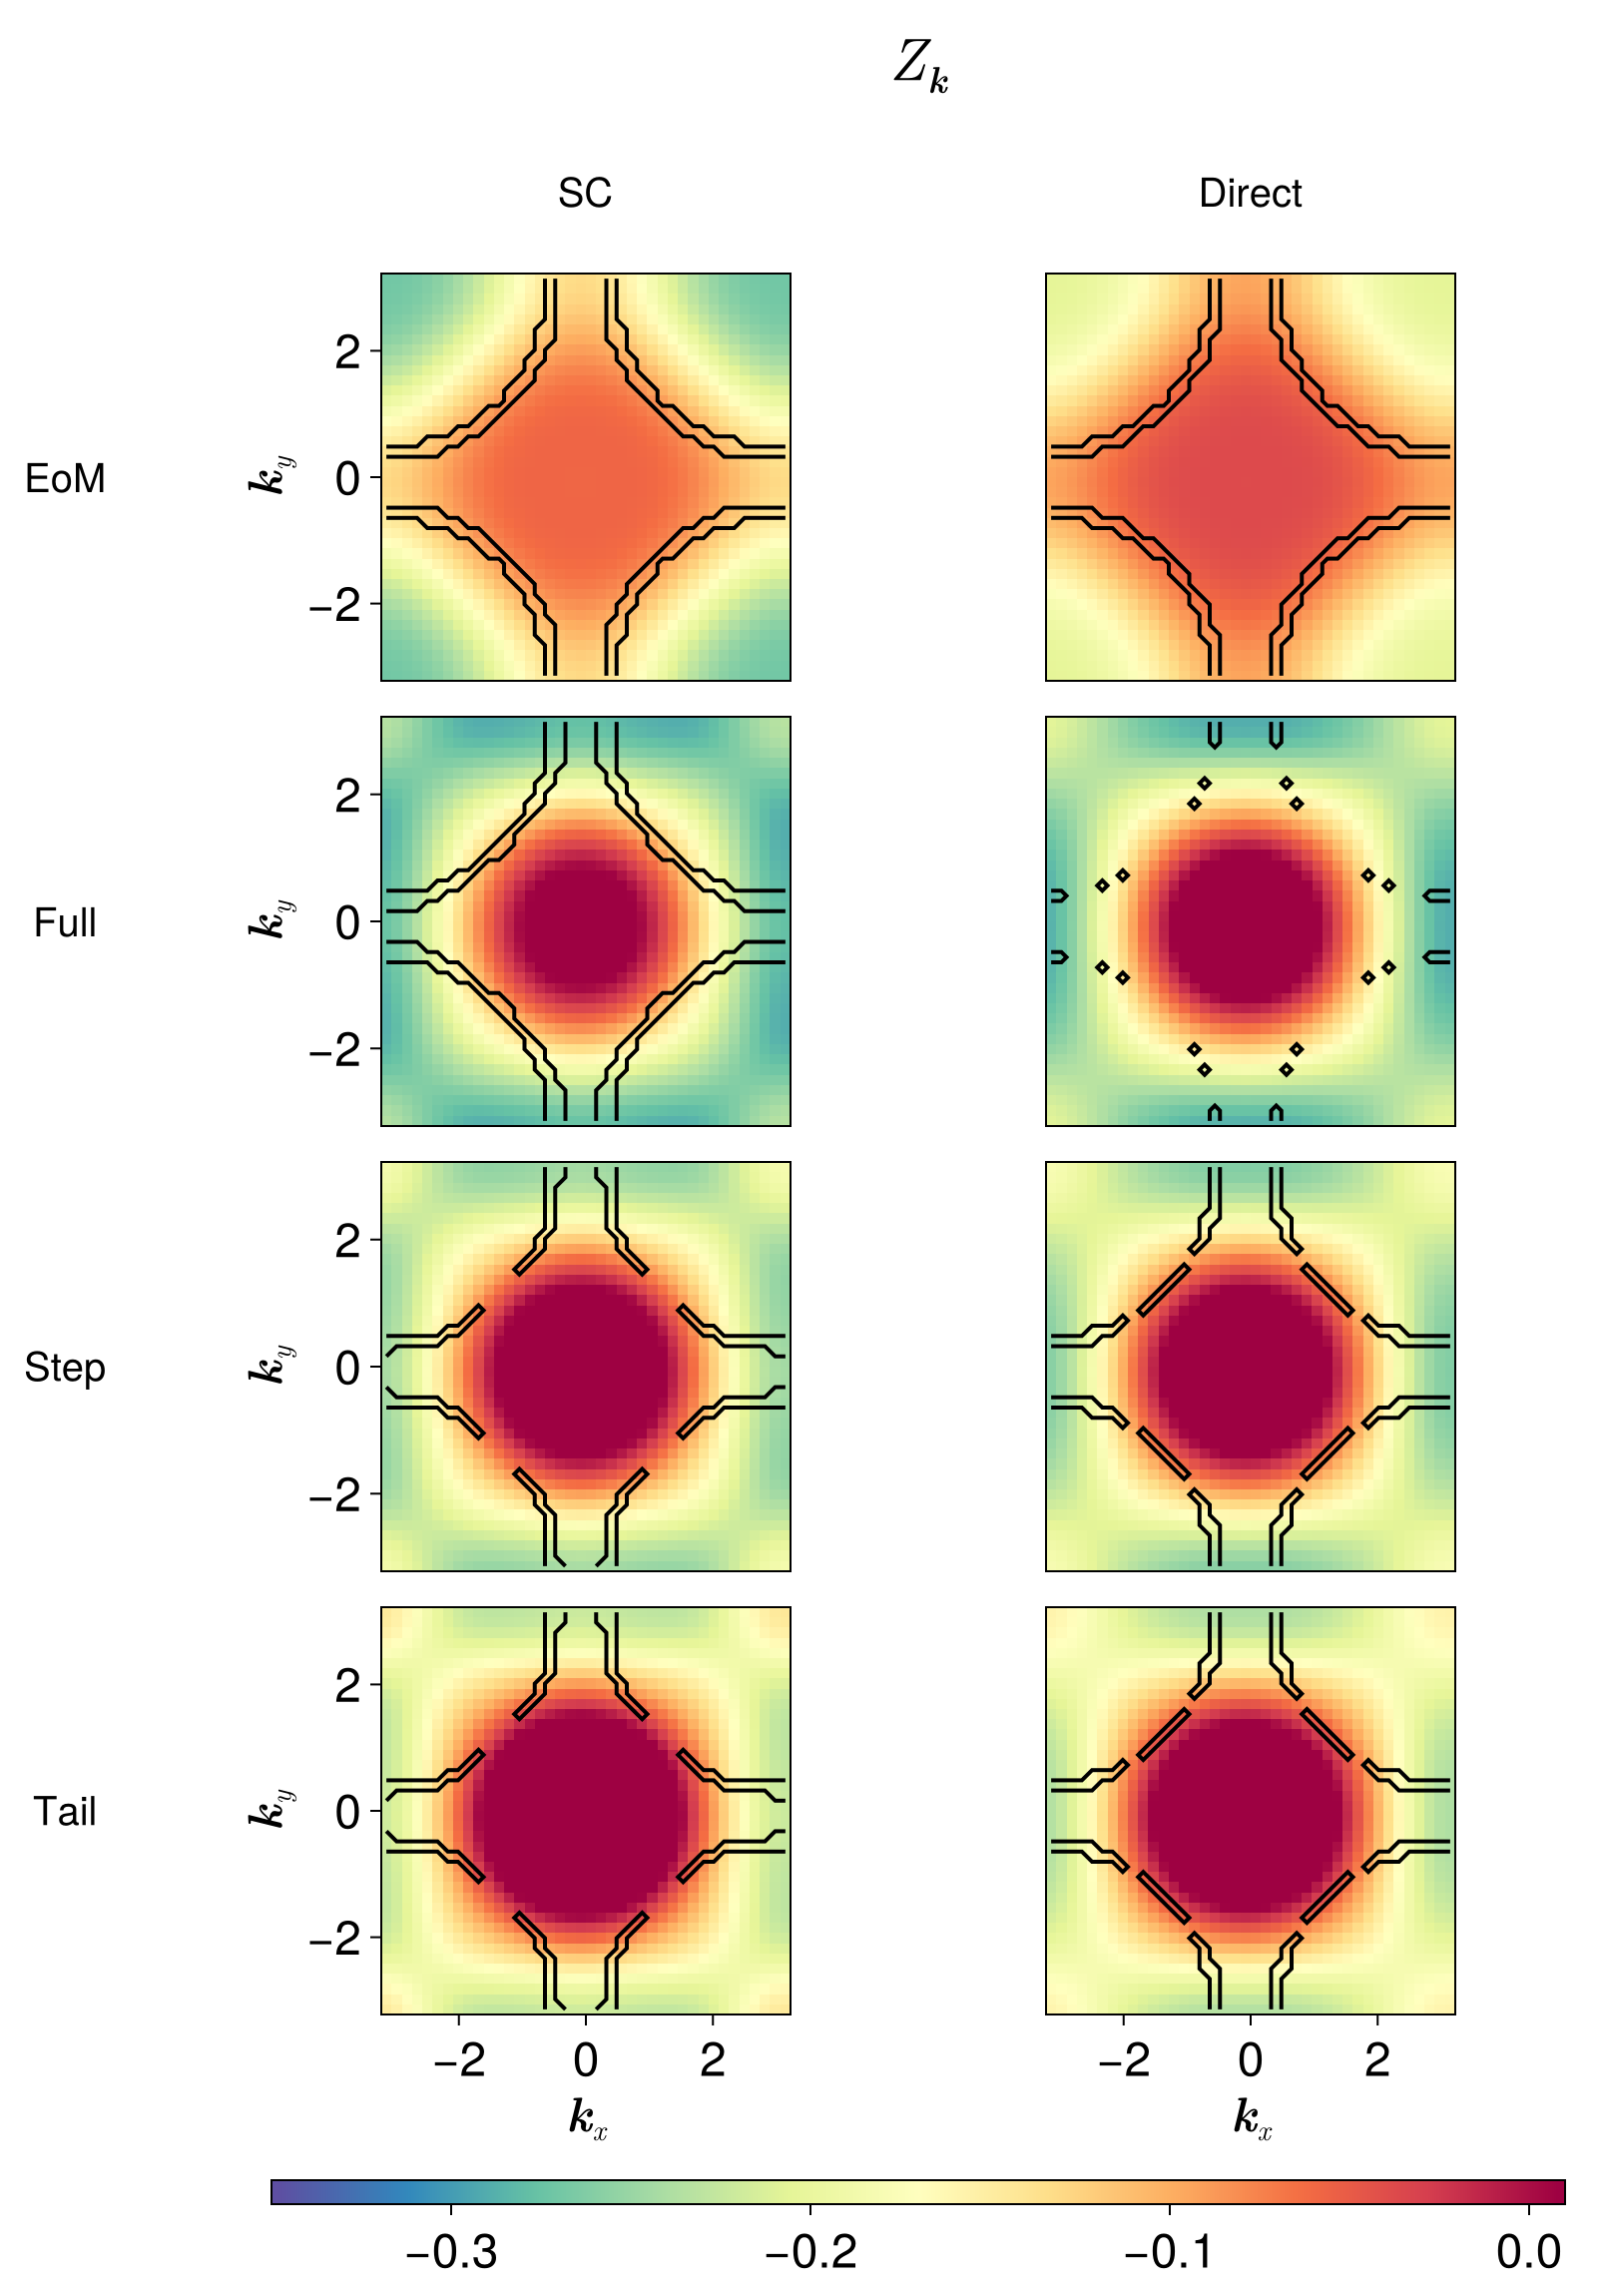

In [81]:
using CairoMakie
clims= (-0.35,0.01)
fig = Figure(fontsize = 24, size=(800,1150))
ax1 = Axis(fig[1, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, EoM)}")
hm  = CairoMakie.heatmap!(ax1, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_sc_EoM.Σ_ladder, lDGAhelper.mP.β).parent), colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax1, xr,xr,ef_dm_sc_tc_eom, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax1, grid = false)
ax2 = Axis(fig[1, 2],aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(EoM)}")
hm2  = CairoMakie.heatmap!(ax2, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_EoM.Σ_ladder, lDGAhelper.mP.β).parent),  colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax2, xr,xr, ef_dm_tc_eom, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax2, grid = false)
hideydecorations!(ax2, grid = false)
linkyaxes!(ax1, ax2)

ax3 = Axis(fig[2, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, Full)}")
hm3  = CairoMakie.heatmap!(ax3, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_sc_Full.Σ_ladder, lDGAhelper.mP.β).parent), colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax3, xr,xr,ef_dm_sc_tc_full, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax3, grid = false)
ax4 = Axis(fig[2, 2], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(Full)}")
hm4  = CairoMakie.heatmap!(ax4, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_Full.Σ_ladder, lDGAhelper.mP.β).parent), colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax4, xr,xr,ef_dm_tc_full, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax4, grid = false)
hideydecorations!(ax4, grid = false)

ax5 = Axis(fig[3, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, Step\{0.7\})}")
hm  = CairoMakie.heatmap!(ax5, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_sc_Step.Σ_ladder, lDGAhelper.mP.β).parent),  colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax5, xr,xr,ef_dm_sc_tc_tail, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax5, grid = false)
ax6 = Axis(fig[3, 2], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(Step\{0.7\})}")
hm6  = CairoMakie.heatmap!(ax6, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_Step.Σ_ladder, lDGAhelper.mP.β).parent), colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax6, xr,xr,ef_dm_tc_tail, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax6, grid = false)
hideydecorations!(ax6, grid = false)


ax7 = Axis(fig[4, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, Step\{0.7\})}")
hm  = CairoMakie.heatmap!(ax7, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_sc_Tail.Σ_ladder, lDGAhelper.mP.β).parent),  colormap =Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax7, xr,xr,ef_dm_sc_tc_tail, color = :black, levels = 1,linewidth=2)
ax8 = Axis(fig[4, 2], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(Step\{0.7\})}")
hm8  = CairoMakie.heatmap!(ax8, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_Tail.Σ_ladder, lDGAhelper.mP.β).parent), colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax8, xr,xr,ef_dm_tc_tail, color = :black, levels = 1,linewidth=2)
hideydecorations!(ax8, grid = false)
resize_to_layout!(fig)

Colorbar(fig[5, :], limits =clims, colormap = Reverse(:Spectral),
    vertical = false, flipaxis = false)
Label(fig[-1,:], text=L" Z_\mathbf{k}", fontsize=30)
Label(fig[0, 1], text = "SC", fontsize = 20)
Label(fig[0, 2], text = "Direct", fontsize = 20)
Label(fig[1, 0], text = "EoM", fontsize = 20)
Label(fig[2, 0], text = "Full", fontsize = 20)
Label(fig[3, 0], text = "Step", fontsize = 20)
Label(fig[4, 0], text = "Tail", fontsize = 20)
colsize!(fig.layout, 0, Relative(0.05))
colsize!(fig.layout, 1, Relative(0.475))
colsize!(fig.layout, 2, Relative(0.475))
rowsize!(fig.layout, -1, Relative(0.05))
rowsize!(fig.layout, 0, Relative(0.05))
rowsize!(fig.layout, 1, Relative(0.225))
rowsize!(fig.layout, 2, Relative(0.225))
rowsize!(fig.layout, 3, Relative(0.225))
rowsize!(fig.layout, 4, Relative(0.225))
Makie.save("ImSig_all_n0.83.pdf", fig)
fig

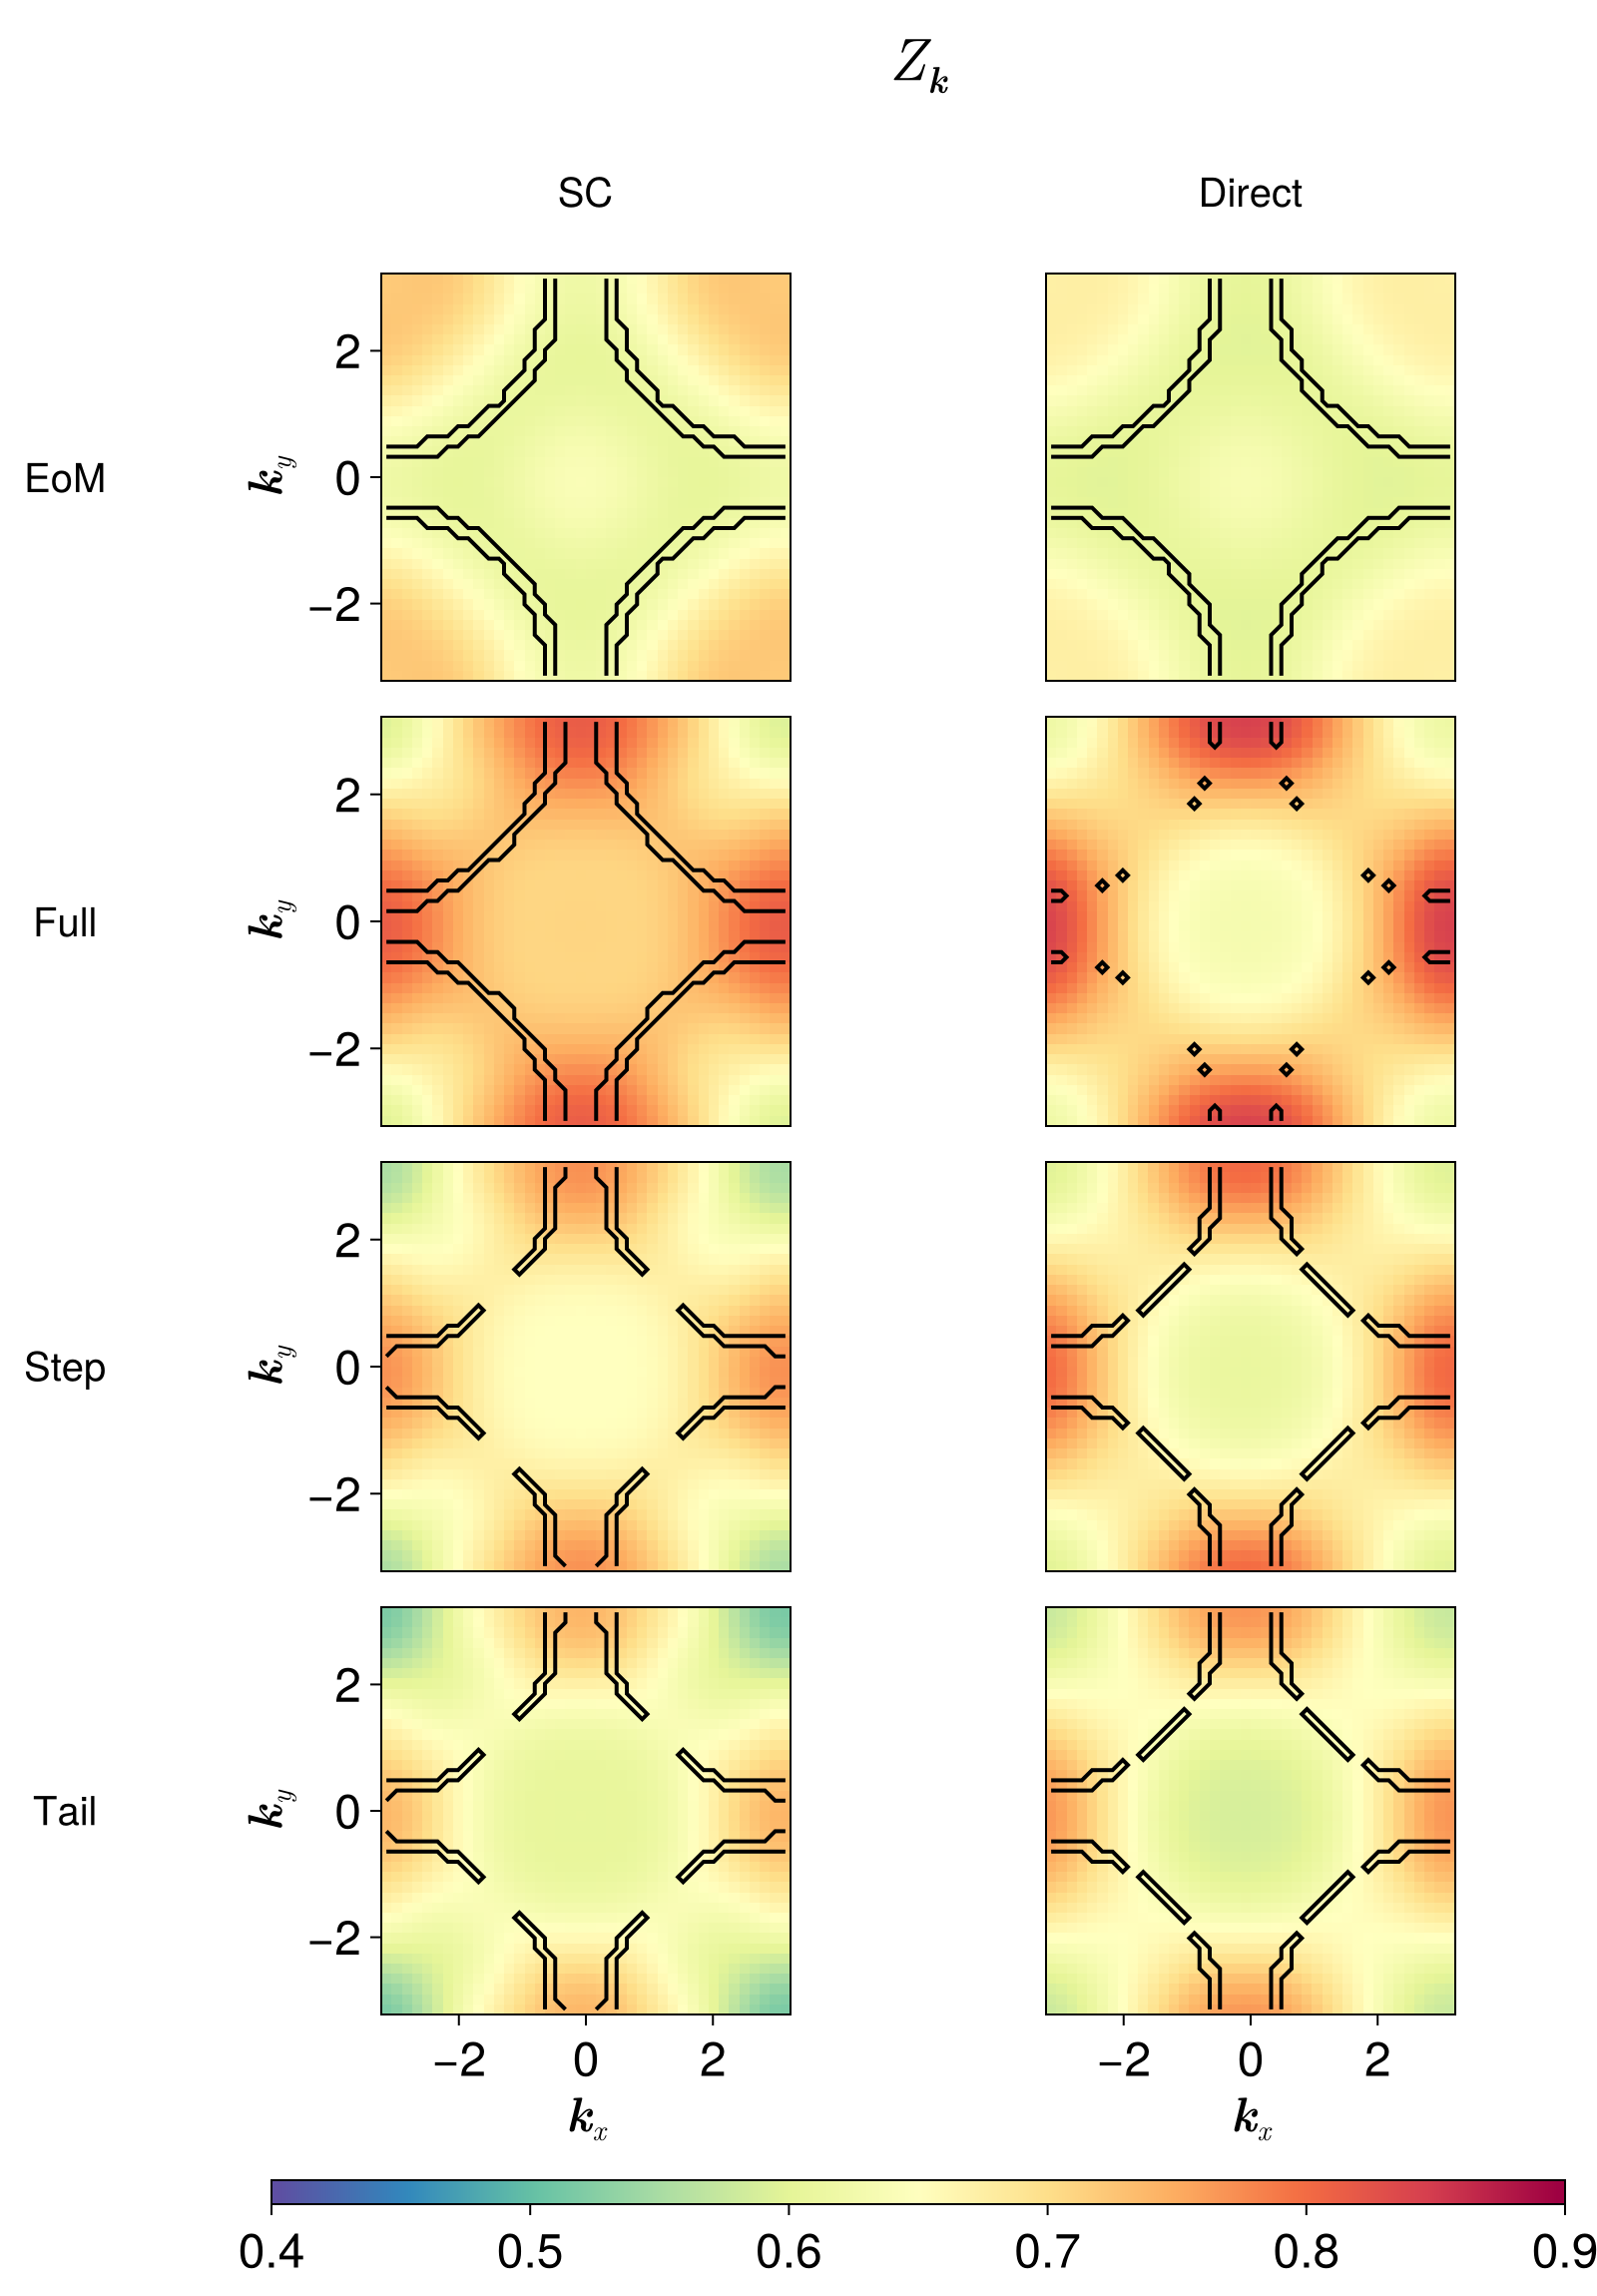

In [80]:
using CairoMakie
clims= (0.4,.9)
fig = Figure(fontsize = 24, size=(800,1150))
ax1 = Axis(fig[1, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, EoM)}")
hm  = CairoMakie.heatmap!(ax1, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, get_Z(res_dm_sc_EoM.Σ_ladder, lDGAhelper.mP.β).parent), colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax1, xr,xr,ef_dm_sc_tc_eom, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax1, grid = false)
ax2 = Axis(fig[1, 2],aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(EoM)}")
hm2  = CairoMakie.heatmap!(ax2, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, get_Z(res_dm_EoM.Σ_ladder, lDGAhelper.mP.β).parent),  colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax2, xr,xr, ef_dm_tc_eom, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax2, grid = false)
hideydecorations!(ax2, grid = false)
linkyaxes!(ax1, ax2)

ax3 = Axis(fig[2, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, Full)}")
hm3  = CairoMakie.heatmap!(ax3, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, get_Z(res_dm_sc_Full.Σ_ladder, lDGAhelper.mP.β).parent), colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax3, xr,xr,ef_dm_sc_tc_full, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax3, grid = false)
ax4 = Axis(fig[2, 2], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(Full)}")
hm4  = CairoMakie.heatmap!(ax4, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, get_Z(res_dm_Full.Σ_ladder, lDGAhelper.mP.β).parent), colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax4, xr,xr,ef_dm_tc_full, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax4, grid = false)
hideydecorations!(ax4, grid = false)

ax5 = Axis(fig[3, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, Step\{0.7\})}")
hm  = CairoMakie.heatmap!(ax5, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, get_Z(res_dm_sc_Step.Σ_ladder, lDGAhelper.mP.β).parent),  colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax5, xr,xr,ef_dm_sc_tc_tail, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax5, grid = false)
ax6 = Axis(fig[3, 2], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(Step\{0.7\})}")
hm6  = CairoMakie.heatmap!(ax6, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, get_Z(res_dm_Step.Σ_ladder, lDGAhelper.mP.β).parent), colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax6, xr,xr,ef_dm_tc_tail, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax6, grid = false)
hideydecorations!(ax6, grid = false)


ax7 = Axis(fig[4, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, Step\{0.7\})}")
hm  = CairoMakie.heatmap!(ax7, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, get_Z(res_dm_sc_Tail.Σ_ladder, lDGAhelper.mP.β).parent),  colormap =Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax7, xr,xr,ef_dm_sc_tc_tail, color = :black, levels = 1,linewidth=2)
ax8 = Axis(fig[4, 2], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(Step\{0.7\})}")
hm8  = CairoMakie.heatmap!(ax8, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, get_Z(res_dm_Tail.Σ_ladder, lDGAhelper.mP.β).parent), colormap = Reverse(:Spectral), colorrange=clims)
CairoMakie.contour!(ax8, xr,xr,ef_dm_tc_tail, color = :black, levels = 1,linewidth=2)
hideydecorations!(ax8, grid = false)
resize_to_layout!(fig)

Colorbar(fig[5, :], limits =clims, colormap = Reverse(:Spectral),
    vertical = false, flipaxis = false)
Label(fig[-1,:], text=L" Z_\mathbf{k}", fontsize=30)
Label(fig[0, 1], text = "SC", fontsize = 20)
Label(fig[0, 2], text = "Direct", fontsize = 20)
Label(fig[1, 0], text = "EoM", fontsize = 20)
Label(fig[2, 0], text = "Full", fontsize = 20)
Label(fig[3, 0], text = "Step", fontsize = 20)
Label(fig[4, 0], text = "Tail", fontsize = 20)
colsize!(fig.layout, 0, Relative(0.05))
colsize!(fig.layout, 1, Relative(0.475))
colsize!(fig.layout, 2, Relative(0.475))
rowsize!(fig.layout, -1, Relative(0.05))
rowsize!(fig.layout, 0, Relative(0.05))
rowsize!(fig.layout, 1, Relative(0.225))
rowsize!(fig.layout, 2, Relative(0.225))
rowsize!(fig.layout, 3, Relative(0.225))
rowsize!(fig.layout, 4, Relative(0.225))
Makie.save("Zk_all_n0.83.pdf", fig)
fig

In [ ]:

p_re_sc_tc_eom = heatmap(xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_re(res_dm_sc_tc_eom.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Re}[\Sigma^\nu_\mathbf{k}]\;\mathrm{(sc)}")
p_im_sc_tc_eom = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_sc_tc_eom.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Im}[\Sigma^\nu_\mathbf{k}]\;\mathrm{(sc)}")
p_re_tc_eom = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_re(res_dm_tc_eom.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Re}[\Sigma^\nu_\mathbf{k}]")
p_im_tc_eom = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_tc_eom.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Im}[\Sigma^\nu_\mathbf{k}]")
plot(p_re_sc_tc_eom, p_im_sc_tc_eom, p_re_tc_eom, p_im_tc_eom)

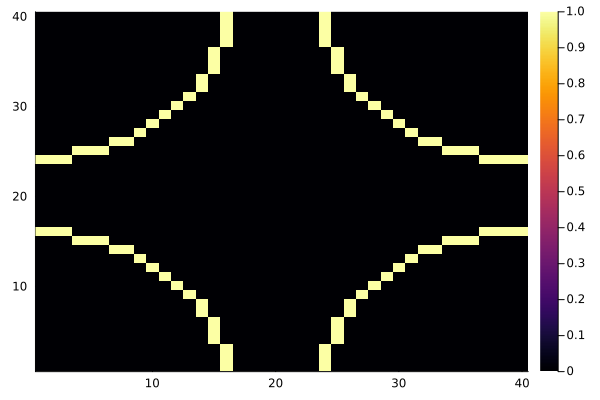

In [51]:
ef, rc = estimate_connected_ef(res_dm_tc_eom.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
heatmap(LadderDGA.expandKArr(lDGAhelper.kG,convert.(Float64,ef.parent)))

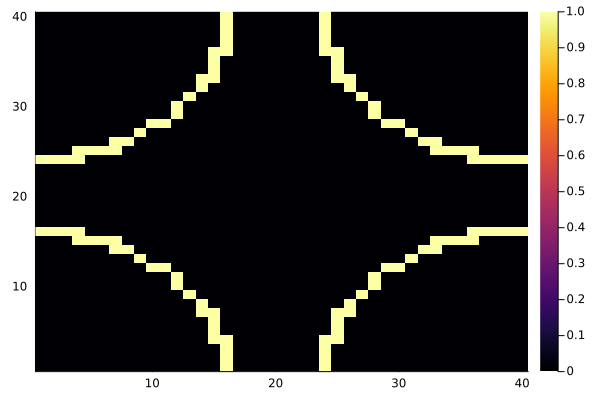

In [52]:
ef, rc = estimate_connected_ef(res_dm_sc_tc_eom.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
heatmap(LadderDGA.expandKArr(lDGAhelper.kG,convert.(Float64,ef.parent)))

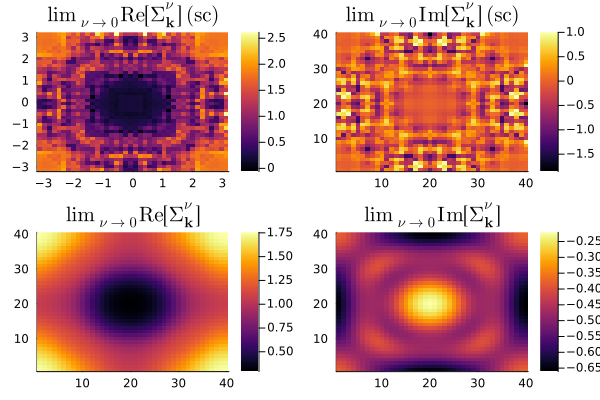

In [27]:
xr = collect(LinRange(-π, π, 40))
p_re_sc_tc_full = heatmap(xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, get0_re(res_dm_sc.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Re}[\Sigma^\nu_\mathbf{k}]\;\mathrm{(sc)}")
p_im_sc_tc_full = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, get0_im(res_dm_sc.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Im}[\Sigma^\nu_\mathbf{k}]\;\mathrm{(sc)}")
p_re_tc_full = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, get0_re(res_dm.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Re}[\Sigma^\nu_\mathbf{k}]")
p_im_tc_full = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, get0_im(res_dm.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Im}[\Sigma^\nu_\mathbf{k}]")
plot(p_re_sc_tc_full, p_im_sc_tc_full, p_re_tc_full, p_im_tc_full)

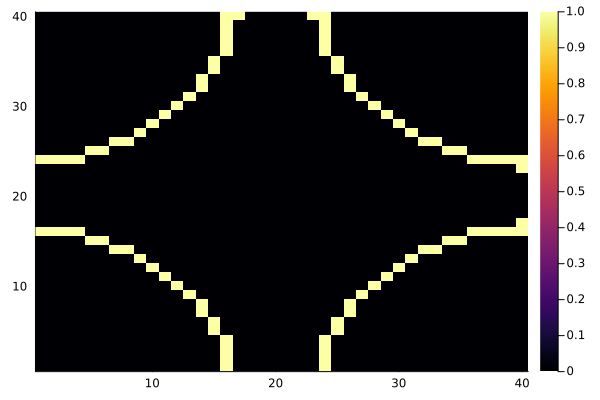

In [54]:
ef, rc = estimate_connected_ef(res_dm.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
heatmap(LadderDGA.expandKArr(lDGAhelper.kG,convert.(Float64,ef.parent)))

In [ ]:
res_dm_sc_tc_eom

In [ ]:
res_dm_tc_eom

In [ ]:
res_dm_sc

In [ ]:
res_dm

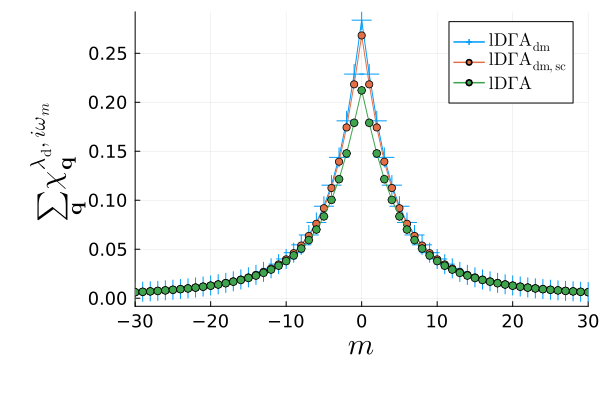

In [78]:
p40n083 = plot(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm40.λd), 1)[1,:], markershape=:auto, markersize=10, xlims=(-30,30),
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, left_margin = 10mm, bottom_margin=10mm,
    label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm}}", xlabel=L"m", ylabel=L"\sum_{\mathbf{q}}\chi^{\lambda_\mathrm{d},i\omega_m}_\mathbf{q}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm_sc40.λd), 1)[1,:], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, 0.0), 1)[1,:], markershape=:octagon, label=L"\mathrm{lD}\Gamma\mathrm{A}")
savefig("chi_d_dm_sc_n0.83.pdf")
display(p40n083)

In [12]:
done = false

wp, mP, sP, env, kGridsStr = readConfig(cfg_file);
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env, silent=false);
bubble_i = nothing
χm_i = nothing
χd_i = nothing
γm_i = nothing
γd_i = nothing
GLoc_fft_i  = lDGAhelper.gLoc_fft
GLoc_rfft_i = lDGAhelper.gLoc_rfft
GLoc_fft_bak = nothing

i = 1
while !done
    bubble_i     = calc_bubble(:DMFT, GLoc_fft_i, GLoc_rfft_i, lDGAhelper.kG, lDGAhelper.mP, lDGAhelper.sP);
    χm_i, γm_i = calc_χγ(:m, lDGAhelper, bubble_i);
    χd_i, γd_i = calc_χγ(:d, lDGAhelper, bubble_i);
    λ₀_i = calc_λ0(bubble_i, lDGAhelper);
    res_dm =  LadderDGA.LambdaCorrection.λdm_correction(χm_i, γm_i, χd_i, γd_i, λ₀_i, lDGAhelper; tc=ΣTail_ExpStep{0.3})
    display(res_dm)
    GLoc_fft_bak = deepcopy(GLoc_fft_i)
    GLoc_fft_i, GLoc_rfft_i = G_fft(res_dm.G_ladder, lDGAhelper.kG, lDGAhelper.sP)
    if i > i
        ΔG = sum(abs.(GLoc_fft_i .- GLoc_fft_bak))
        println("[it=$i] ΔG = ", ΔG)
        ΔG < 1e-10 && (done = true)
    end
    i += 1
end

[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 10
┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.4356, χLoc_d(1:301) = 0.0644
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24860048983264754 ?=? 0.2500077791504396 ?≈? 0.25000777915043954 ≟ 0.24999903238559407"
│ Local EoM check for the first 5 frequencies: 0.0001, 0.0002, 0.0002, 0.0003, 0.0003  
└     


DBG: NOT using diagonal terms in λ₀


[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.001142716936 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.00070090836 ≟ 0


DBG: NOT using diagonal terms in λ₀


╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.05317304, λd = 2.35284571, μ = 0.98568446                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.11227092,  Epot_2  =  0.11227092,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.21629635,  Ekin_2  = -0.20903607,  Δ = 1.7070%                 │
│  χ_m    =  0.44288087,  χ_m_loc = 0.43558908,  Δ = 0.8301%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
[ Info: m channel: |∑χ(q=0,ω≠0)| = 1.324441128817 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.864247890386 ≟ 0


DBG: NOT using diagonal terms in λ₀


LoadError: ArgumentError: range(16.490175733977157, stop=5.0, length=-114): negative length